# **Lab 5** - Image Segmentation
## B
## Ardian
## 2106638173

### Used Libraries:

In [2]:
from skimage import io, util, filters, feature
from skimage.segmentation import slic, mark_boundaries
import matplotlib.pyplot as plt
import cv2
import numpy as np

## 1. bubble.jpg

Text(0.5, 1.0, 'bubble')

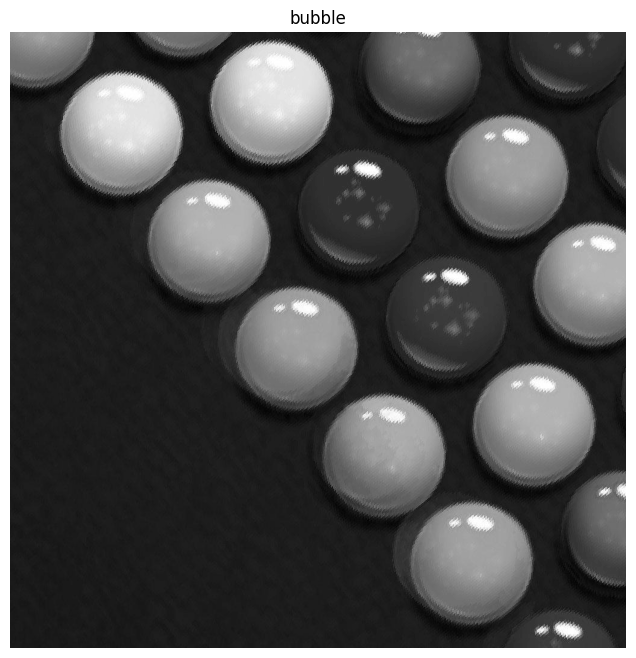

In [5]:
bubble = io.imread('bubble.jpg', as_gray = True)

plt.figure(figsize = (12, 8))
plt.imshow(bubble, cmap = 'gray')
plt.axis('off')
plt.title('bubble')

### a. Lakukan Basic Edge Detection dengan thresholding pada citra tersebut

Text(0.5, 1.0, "bubble's Edges Thresholded")

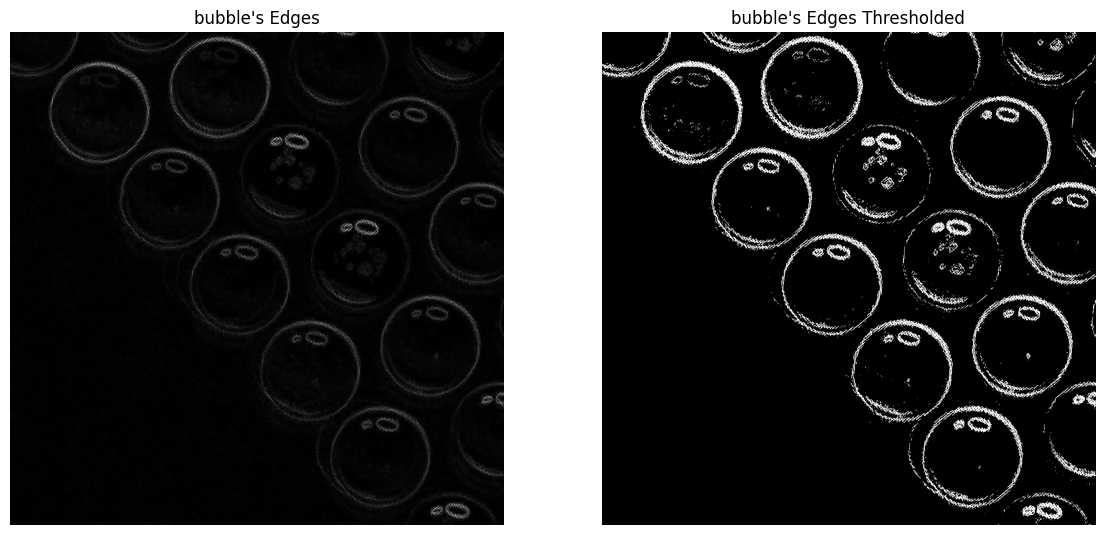

In [46]:
bubble_edges = filters.sobel(bubble)
_, bubble_edges_thresholded = cv2.threshold(bubble_edges, 0.05, 255,
                                            cv2.THRESH_BINARY)

plt.figure(figsize=(14, 12))

plt.subplot(1, 2, 1)
plt.imshow(bubble_edges, cmap='gray')
plt.axis('off')
plt.title("bubble's Edges")

plt.subplot(1, 2, 2)
plt.imshow(bubble_edges_thresholded, cmap='gray')
plt.axis('off')
plt.title("bubble's Edges Thresholded")

### b. Lakukan Otsu’s Thresholding (beserta histogramnya) pada citra tersebut

Text(0.5, 1.0, 'Histogram of bubble Otsu Thresholded')

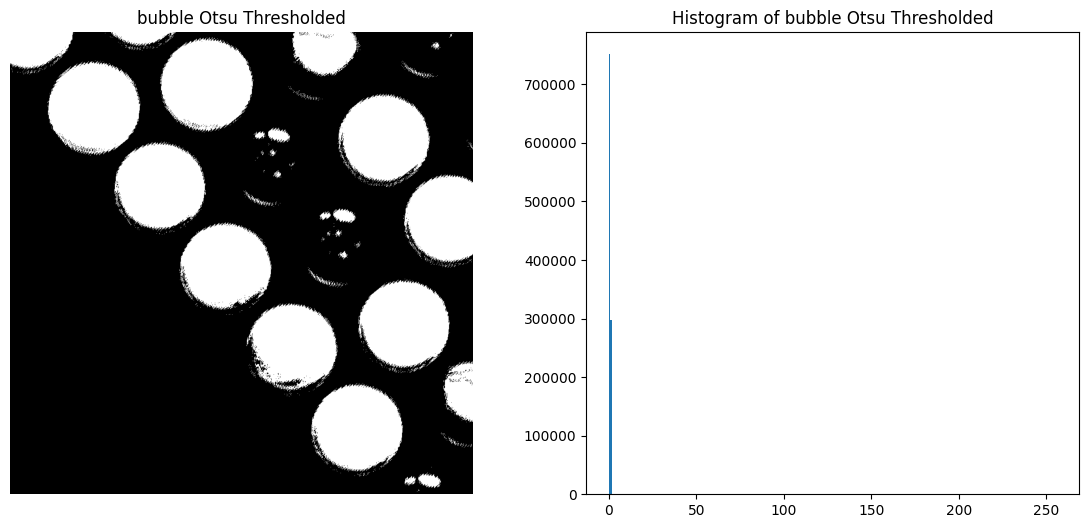

In [16]:
otsu_value = filters.threshold_otsu(bubble)
bubble_otsu_thresholded = util.img_as_float(bubble > otsu_value)

bubble_otsu_thresholded_histogram = bubble_otsu_thresholded.flatten()

plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
plt.imshow(bubble_otsu_thresholded, cmap = 'gray')
plt.axis('off')
plt.title('bubble Otsu Thresholded')

plt.subplot(1, 2, 2)
plt.hist(bubble_otsu_thresholded_histogram, 256, range=(0, 256))
plt.title('Histogram of bubble Otsu Thresholded')

### c. Jelaskan perbedaan hasil dari basic edge detection + thresholding pada (a) dan Otsu’s Thresholding pada (b) dan alasan mengapa perbedaan tersebut bisa terjadi.

Otsu's Thresholding menghasilkan gambar biner yang lebih kuat dan bersih. Ini karena Otsu's Thresholding menggunakan pendekatan statistik untuk menemukan nilai threshold optimal, yang meminimalkan intra-class variance dari piksel objek dan latar belakang. Hal ini membuat Otsu's Thresholding tidak sensitif terhadap noise pada gambar dan lebih cenderung menghasilkan hasil yang akurat. Berikut penjelasan singkat tentang perbedaan utama antara kedua gambar:

#### **Basic edge detection + thresholding:**
Gambar ini mengandung beberapa noise dan artefak di latar belakang, dan tepi gelembung tidak sejelas pada gambar Otsu's Thresholding.

#### **Otsu's Thresholding:**
Gambar ini memiliki latar belakang yang lebih bersih dan tepi gelembung yang jelas. Keseluruhan gambar juga lebih seragam dalam penampilan.

### d. Tentukan metode mana yang lebih optimal untuk citra ini dan mengapa?


Metode yang lebih optimal untuk citra bubble.jpg adalah Otsu's Thresholding. Hal ini karena Otsu's Thresholding menghasilkan gambar biner yang lebih kuat dan bersih, dengan latar belakang yang lebih bersih dan tepi gelembung yang jelas.

Metode basic edge detection + thresholding menghasilkan gambar yang kurang bersih dan akurat. Gambar tersebut mengandung beberapa noise dan artefak di latar belakang, dan tepi gelembung tidak sejelas pada gambar Otsu's Thresholding.

Otsu's Thresholding lebih optimal untuk citra ini karena menggunakan pendekatan statistik untuk menemukan nilai threhshold optimal. Pendekatan ini meminimalkan intra-class variance dari piksel latar depan dan latar belakang, yang membuat Otsu's Thresholding kurang sensitif terhadap noise pada gambar dan lebih cenderung menghasilkan hasil yang akurat.

Berikut beberapa alasan spesifik mengapa Otsu's Thresholding lebih optimal untuk citra bubble.jpg:

*   Otsu's Thresholding menghilangkan noise dari latar belakang, yang membuat gelembung lebih terlihat.
*   Otsu's Thresholding menghasilkan tepi gelembung yang lebih jelas, yang membuatnya lebih mudah untuk diidentifikasi dan diproses.
*   Otsu's Thresholding menghasilkan gambar biner yang lebih seragam, yang membuatnya lebih mudah untuk dianalisis.

Secara keseluruhan, Otsu's Thresholding adalah metode yang lebih andal dan efektif untuk thresholding gambar daripada basic edge detection + thresholding.

## 2. flower.jpeg

Text(0.5, 1.0, 'flower')

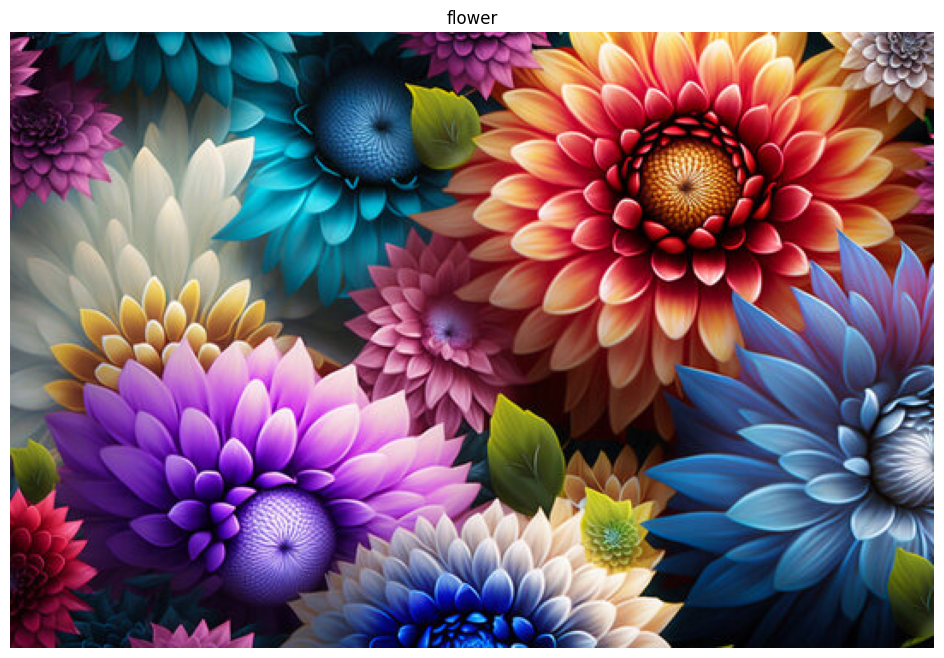

In [ ]:
flower = io.imread('flower.jpeg')

plt.figure(figsize = (12, 8))
plt.imshow(flower, cmap = 'gray')
plt.axis('off')
plt.title('flower')

### a. Gunakan algoritma SLIC untuk melakukan segmentasi dengan variasi jumlah segmen 10, 50, dan 100.

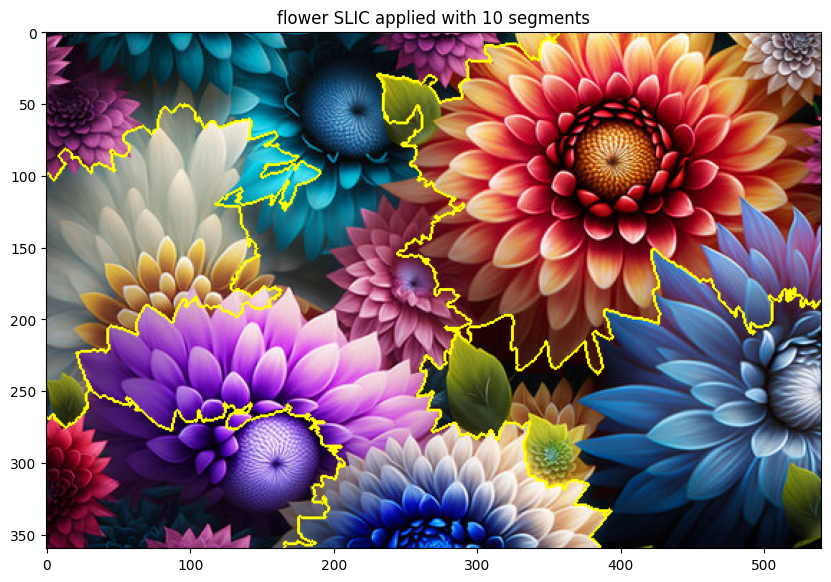

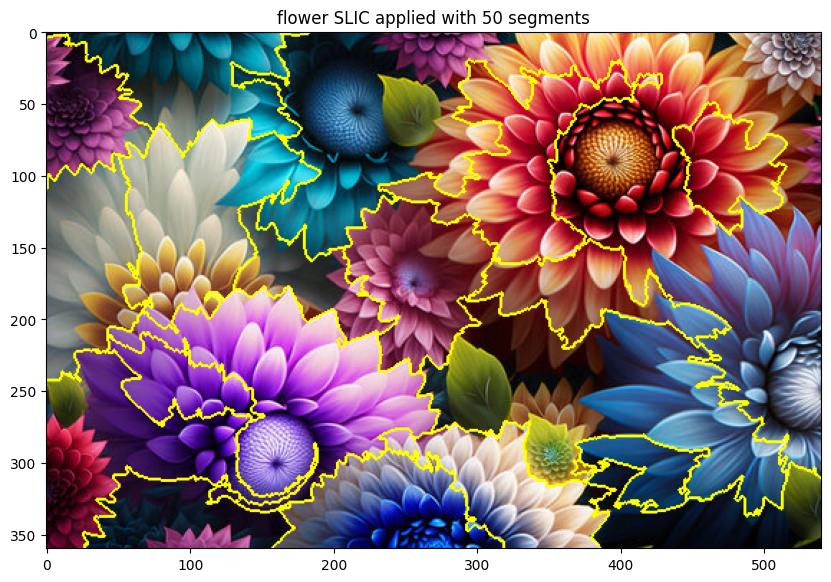

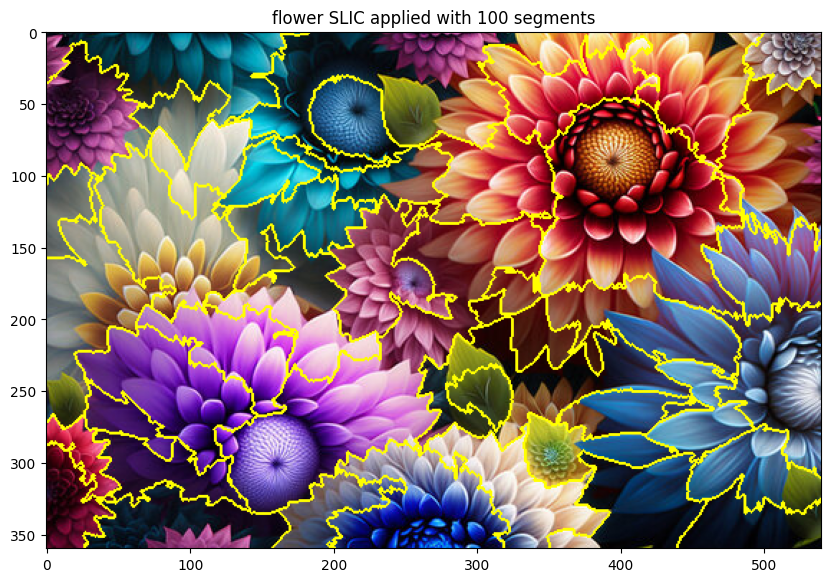

In [ ]:
n_segments = [10, 50, 100]

for n_segments in n_segments:
  clusters = slic(flower, n_segments)

  plt.figure(figsize = (10, 7))
  plt.imshow(mark_boundaries(flower, clusters))
  plt.title(f'flower SLIC applied with {n_segments} segments')

### b. Visualisasikan hasil (a) dalam bentuk penyeragaman piksel untuk setiap superpiksel yang telah disegmentasi. Gunakan nilai median untuk memilih piksel yang dipilih untuk setiap superpiksel.

In [ ]:
def superpixel_median_image(image, slic_labels):
    """
    Turn image into superpixel image, given SLIC segment labels.
    """
    im_rp = image.reshape((image.shape[0] * image.shape[1], image.shape[2]))
    sli_1d = np.reshape(slic_labels, -1)
    uni = np.unique(sli_1d)
    new_img = np.zeros(im_rp.shape)

    for i in uni:
        loc = np.where(sli_1d == i)[0]
        mm = np.median(im_rp[loc, :], axis=0)
        new_img[loc, :] = mm

    return np.reshape(new_img, [image.shape[0], image.shape[1], image.shape[2]]).astype('uint8')


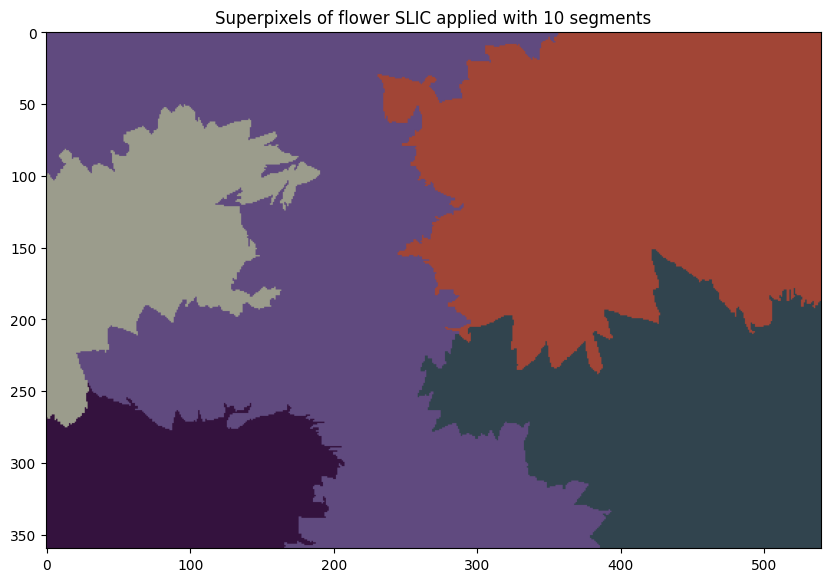

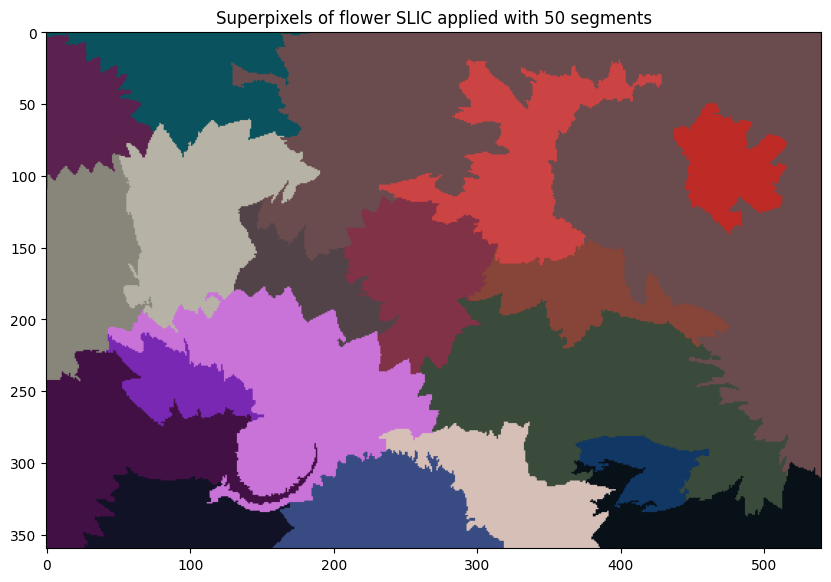

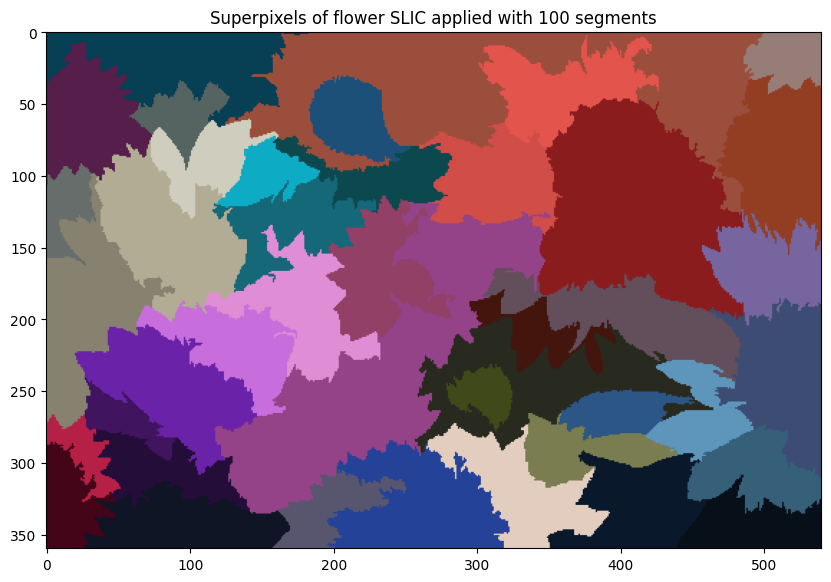

In [ ]:
n_segments = [10, 50, 100]

for n_segments in n_segments:
  clusters = slic(flower, n_segments)

  clusters_superpixel = superpixel_median_image(flower, clusters)

  plt.figure(figsize = (10, 7))
  plt.imshow(clusters_superpixel)
  plt.title(f'Superpixels of flower SLIC applied with {n_segments} segments')

### c. Berdasarkan hasil visualisasi (b), apa pengaruh jumlah segmen terhadap hasil segmentasi? Menurut anda, berapa jumlah segmen yang memberikan hasil terbaik?

Jumlah segmen yang di-input dalam algoritma SLIC mempengaruhi tingkat detail segmentasi citra. Jumlah segmen rendah menghasilkan segmentasi kasar tanpa detail, sementara jumlah segmen tinggi memberikan segmentasi yang lebih rinci yang tentu bisa berlebihan. Pemilihan jumlah segmen terbaik sangatlah bergantung pada gambarnya dan apa yang diinginkan dari hasil segmentasi gambarnya.

Untuk kasus gambar flower.jpg, dengan asumsi bahwa gambar ingin disegmentasikan berdasarkan jenis warna bunga, maka jumlah segmen terbaik menurut saya adalah sekitar enam sampai delapan, melihat terdapat sekitar enam sampai delapan jenis warna bunga berdasarkan kemampuan pribadi saya dalam membedakan warna.

Metrik evaluasi seperti Rand Index dapat membantu menilai hasil segmentasi.